<a href="https://colab.research.google.com/github/Trrunghau/AI/blob/week9/cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
from keras.datasets import cifar100
(x_train,y_train),(x_test,y_test)=cifar100.load_data()

In [2]:
x_train.shape
x_test.shape

(10000, 32, 32, 3)

In [3]:
x_train[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [195, 205, 193],
        [212, 224, 204],
        [182, 194, 167]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 176, 150],
        [161, 168, 130],
        [146, 154, 113]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [189, 199, 169],
        [166, 178, 130],
        [121, 133,  87]],

       ...,

       [[148, 185,  79],
        [142, 182,  57],
        [140, 179,  60],
        ...,
        [ 30,  17,   1],
        [ 65,  62,  15],
        [ 76,  77,  20]],

       [[122, 157,  66],
        [120, 155,  58],
        [126, 160,  71],
        ...,
        [ 22,  16,   3],
        [ 97, 112,  56],
        [141, 161,  87]],

       [[ 87, 122,  41],
        [ 88, 122,  39],
        [101, 134,  56],
        ...,
        [ 34,  36,  10],
        [105, 133,  59],
        [138, 173,  79]]

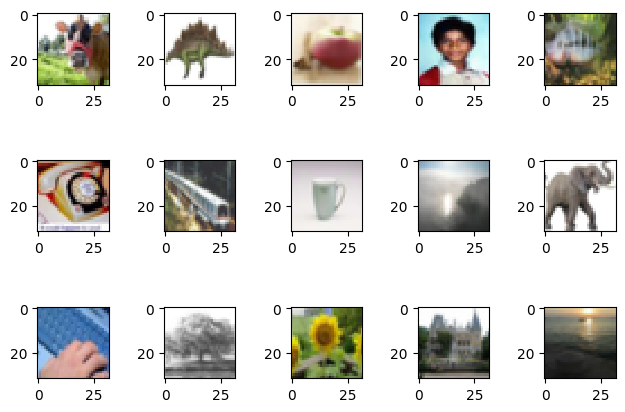

In [69]:
import matplotlib.pyplot as plt
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  #plt.title('{}'.format(classes[int(y_train[i])]))
  plt.xticks
  plt.yticks

In [5]:
from keras import models
from keras.layers import Dense

In [70]:
from keras.models.cloning import Sequential
model=Sequential()
model.add(Dense(512,activation='relu',input_shape = (32*32*3,),name='layer1'))
model.add(Dense(512,activation='relu',name='layer2'))
model.add(Dense(512,activation='relu',name='layer3'))

model.add(Dense(100,activation='softmax',name='layerN'))  # 10 layout
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 512)               1573376   
                                                                 
 layer2 (Dense)              (None, 512)               262656    
                                                                 
 layer3 (Dense)              (None, 512)               262656    
                                                                 
 layerN (Dense)              (None, 100)               51300     
                                                                 
Total params: 2,149,988
Trainable params: 2,149,988
Non-trainable params: 0
_________________________________________________________________


In [71]:
x_train = x_train.reshape((50000,32*32*3)) # đổi đầu vào thành 1 dãy
x_train = x_train.astype('float32')/255.0 # đổi kiểu int sang float
x_test = x_test.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255.0
print('Original label:', y_train[0])
from keras.utils import to_categorical  # chuyển output sang số 1 nổi, 1 lần  
y_train = to_categorical(y_train,100)
y_test = to_categorical(y_test,100)
x_train.shape
x_train[0]

print('after one hot',y_train[0])

Original label: [19]
after one hot [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [72]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics= ['accuracy'])
model.fit(x_train,y_train,epochs=18,batch_size=256,validation_data=(x_test,y_test))


Epoch 1/18
196/196 [==============================] - 17s 82ms/step - loss: 4.0629 - accuracy: 0.0813 - val_loss: 3.7546 - val_accuracy: 0.1297
Epoch 2/18
196/196 [==============================] - 15s 74ms/step - loss: 3.6357 - accuracy: 0.1452 - val_loss: 3.5914 - val_accuracy: 0.1593
Epoch 3/18
196/196 [==============================] - 15s 76ms/step - loss: 3.4683 - accuracy: 0.1733 - val_loss: 3.4844 - val_accuracy: 0.1797
Epoch 4/18
196/196 [==============================] - 14s 73ms/step - loss: 3.3287 - accuracy: 0.2000 - val_loss: 3.4318 - val_accuracy: 0.1903
Epoch 5/18
196/196 [==============================] - 14s 74ms/step - loss: 3.2204 - accuracy: 0.2184 - val_loss: 3.3368 - val_accuracy: 0.2055
Epoch 6/18
196/196 [==============================] - 15s 76ms/step - loss: 3.1285 - accuracy: 0.2347 - val_loss: 3.2991 - val_accuracy: 0.2137
Epoch 7/18
196/196 [==============================] - 16s 81ms/step - loss: 3.0452 - accuracy: 0.2481 - val_loss: 3.2373 - val_accuracy:

In [73]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('độ chính xác:',test_acc)
print('hàm mất mát',test_loss)

313/313 [==============================] - 2s 7ms/step - loss: 3.4197 - accuracy: 0.2520
độ chính xác: 0.25200000405311584
hàm mất mát 3.419745683670044


In [74]:
model.save('modelCIFAR100.h5')

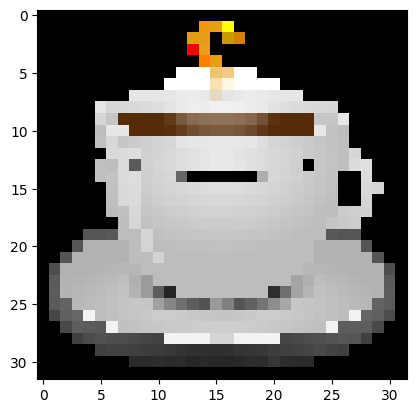

In [80]:
from keras.utils import load_img
from keras.utils import img_to_array
import matplotlib.pyplot as plt
import numpy as np

url = r'cup.png'
img = load_img(url, target_size=(32, 32))
plt.imshow(img)

In [76]:
classes = ['apple','aquarium_fish','baby','bear','beaver','bed','bee','beetle','bicycle',
'bottle','bowl','boy','bridge','bus','butterfly','camel','can','castle','caterpillar','cattle','chair',
'chimpanzee','clock','cloud','cockroach','couch','cra','crocodile','cup','dinosaur','dolphin','elephant',
'flatfish','forest','fox','girl','hamster','house','kangaroo','keyboard','lamp','lawn_mower','leopard',
'lion','lizard','lobster','man','maple_tree','motorcycle','mountain','mouse','mushroom','oak_tree','orange',
'orchid','otter','palm_tree','pear','pickup_truck','pine_tree','plain','plate','poppy','porcupine','possum',
'rabbit','raccoon','ray','road','rocket','rose','sea','seal','shark','shrew','skunk','skyscraper','snail',
'snake','spider','squirrel','streetcar','sunflower','sweet_pepper','table','tank','telephone','television',
'tiger','tractor','train','trout','tulip','turtle','wardrobe','whale','willow_tree','wolf','woman','worm']

In [81]:
from keras.models import load_model
model1 = load_model('modelCIFAR100.h5')
img = img_to_array(img)
img = img.reshape(1, 32*32*3)
img = img.astype('float32') / 255
predicted_label = classes[model1.predict(img).argmax()]
print("{}".format(predicted_label))

1/1 [==============================] - 0s 70ms/step
lamp
